# Exercise 10

Georgina Gomes GMSGEO001

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [9]:
#%% Spatial shape of the temperature disturbance
def Gaussian(x, sigma):
    # This is a Gaussian (peak) function with the following params
    T0 = 15         # baseline temperature [degC]
                    # sigma = width at half amplitude [m]
    A = 5.          # amplitude [degC]
    Gaussian = T0+A*np.exp(-(x/sigma)**2)
    return Gaussian

In [10]:
def define_space_time_grid(tmax, dt, xmax, dx):
    # time axis
    number_of_steps = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
    # X axis (centred at 0)
    x = np.arange(-xmax,xmax,dx)
    grid_size = len(x)   # number of grid points
    print('grid size : ',grid_size)
    print('number of timesteps : ',number_of_steps)
    return number_of_steps, x

In [11]:
def create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, sigma):

    number_of_steps, x = define_space_time_grid(tmax, dt, xmax, dx)

    #%% plot an animation of the temperature disturbance 
    fig, ax = plt.subplots()
    # set the axis limits and turn off autoscaling
    plt.axis([-xmax/1000, xmax/1000, 13, 22])
    plt.autoscale(False)
    line, = ax.plot(x/1000., Gaussian(x, sigma),'k')
    ax.set_xlabel('X (km)')
    ax.set_ylabel('T ($^o$C)')
    
    animation.FFMpegWriter = animation.writers['ffmpeg']
    
    def animate(i):
        t = t0 + i*dt
        line.set_ydata(Gaussian(x-c*t, sigma))  # update the data.
        return line,
    
    # create the animation (interval is in ms)
    ani = animation.FuncAnimation(
        fig, animate, interval=200, blit=True, frames=number_of_steps, repeat=True)
    
    # To save the animation, use e.g.
    #ani.save("advection_animation_movie.mp4")
    # or
    # writer = animation.FFMpegWriter(
    #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
    # ani.save("movie.mp4", writer=writer)
    from IPython.display import HTML
    return HTML(ani.to_jshtml())
    plt.show()

grid size :  40
number of timesteps :  44


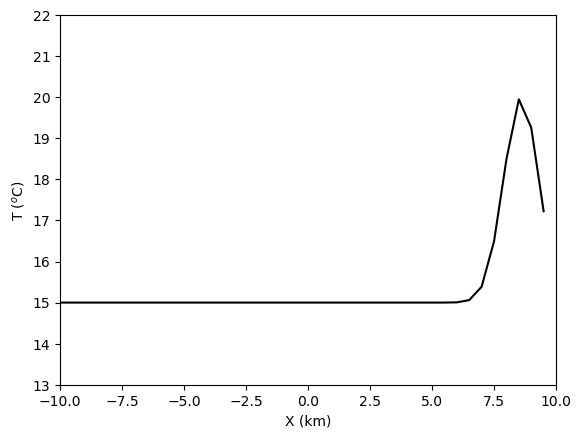

In [12]:
# original problem parameters
c=1         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 1000)

## Part 1: Show what happens when you change the values of dx and c

grid size :  4000
number of timesteps :  44


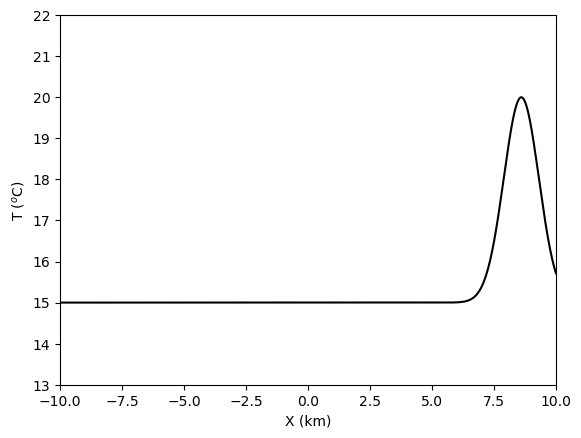

In [14]:
# making dx smaller 
c=1         # Advection speed [m s-1]
dx=5      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 1000)

#### When dx is decreased, the spatial resolution is increased and grid size is increased and the animation appears much smoother.

grid size :  20
number of timesteps :  44


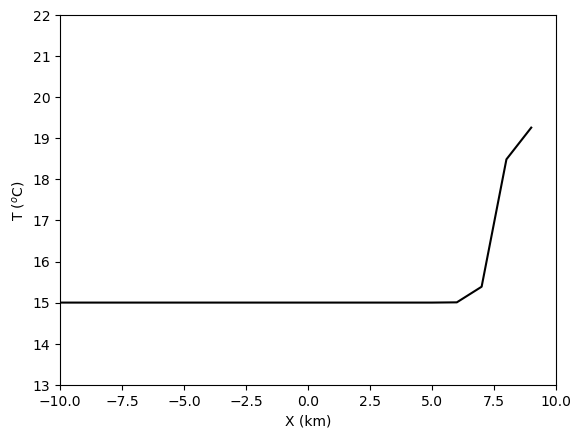

In [16]:
# making dx larger 
c=1         # Advection speed [m s-1]
dx=1000      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 1000)

#### When dx is increased, the spatial resolution is decreased and grid size is decreased and the animation appears with more sharp edges and does not move as smoothly.

grid size :  40
number of timesteps :  44


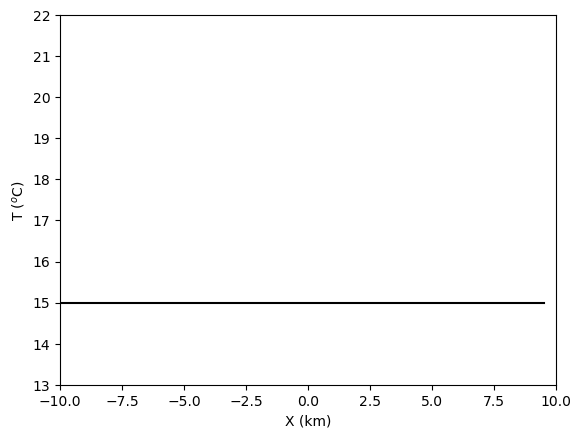

In [17]:
# making c larger, i.e. advection speed faster
c=10         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 1000)

#### Increasing c (the advection speed) shows that the preturbation is rapidly advected away. 

grid size :  40
number of timesteps :  44


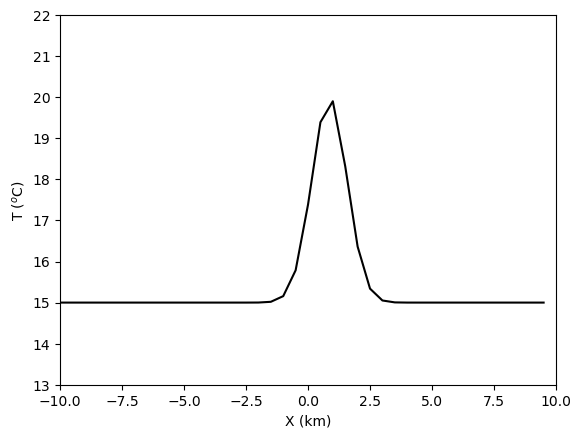

In [18]:
# making c smaller, i.e. advection speed slower
c=0.1         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 1000)

#### As expected, when c is decreased, i.e. the advection speed is slower, the preturbation moves much more slowly along the estuary path as seen in the animation.

## Part 2: Show what happens when you increase or decrease the parameter $\sigma$

grid size :  40
number of timesteps :  44


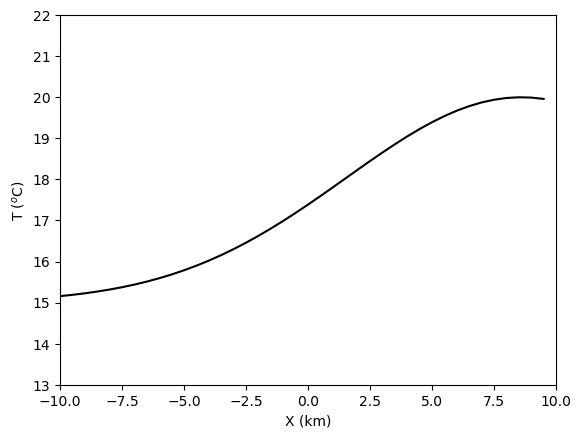

In [19]:
# increasing sigma 10 fold
c=1         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 10000)

#### Increasing sigma makes the temperature change over time be much more gradual with a an oscillation between peaks and troughs rather than an obvious wave spike from a baseline level, this looks to be oscillating about a baseline level.


grid size :  40
number of timesteps :  44


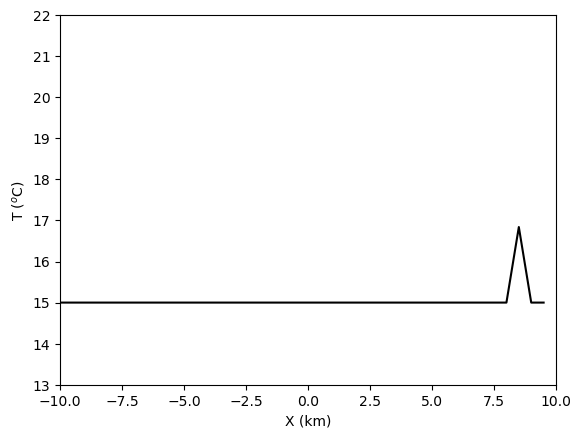

In [20]:
# decreasing sigma 10 fold
create_temperature_disturbance_animation(c, dx, dt, t0, tmax, xmax, 100)

#### Decreasing sigma makes the temperature spike sharply in a non wave like pattern as time moves on
